# Customer Segmentation

A marketing strategy is likely to fail if it does not reach its intended audience. An extreme example can be initiating a marketing strategy to sell pork products in a muslim-dominated region. You may be walking straight into your product's demise by simply not targeting your marketing strategies to its potential customers.

<img src="https://media.giphy.com/media/lV8zIcGziCpiM/giphy.gif">

Customer Segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

~ by <a href="https://searchcustomerexperience.techtarget.com/definition/customer-segmentation" target="_blank">Tim Ehrens</a>

Customer segmentation is increasingly becoming important to every marketing strategy. It places the customers' needs and preferences at the centre of any marketing decision or strategy. With this kind of approach, that customer base has a higher likelihood of buying that product or service. 

To the business, it is equivalent to going for fishing. The aim is to always use minimum allocated resources to get the most value in returns. In other words, ensuring that the marketing resources are effectively allocated to deliver most revenue. Now, if I went fishing all day and all I got is shoes, what a waste of time and energy😡😡😡😡.

<img src="https://media.giphy.com/media/7kJ926qjkxFx6/giphy.gif">

# Clustering

This project covers one of the most common ways of customer segmentation, clustering, and specifically k-Means clustering. The logic behind clustering is fairly simple. It aims at subdiving data into clusters, whose data points are as similar as possible and clusters are as different as possible. It is this similarity in the clusters that can then be used to tailor specific marketing campaigns to specific customer bases.

k-Means clustering is an algorithm that attempts to find the best way to group data points into a specified number of groups. Commonly used with this algorithm is Principal Component Analysis(PCA). This is a technique used to reduce the dimensionality of the data for the purpose of visualizing our clusters. In most cases, we may not only be using two variables to compute our clusters. This may pose challenges when it comes to visualizing the clusters. PCA takes the old dimensions and creates new dimensions(mostly 2) that contain the most information about the data.

With theoretical concepts out of the way let's get into the project.😃😃😃😃

We start by importing the relevant libraries, pandas will be for handling the dataframe, matplotlib and plotly will handle visualizations and sklearn will handle the clustering models.

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import cluster, decomposition

The data represents a marketing campaign by a company that sells different types of wines to its customers. The marketing team launched 32 initiatives over the period and collected data on how each customer responded to each initiative. There is a seperate file containing details about each initiative. The marketing team now intends to have a more focussed approach towards its marketing campaign efforts by segmenting their newly founded market based on the wine type and varietals so as to increase the likelihood of the customer groups responding to their offers or initiatives.

## A Brief Summary on the Types of Wines

<img src="wine.png">

Wine labelling can cause some confusion because different wineries may choose to name their wines differently. Some wineries may choose to name their wines based on the grape varieties while some may choose to name the wine after the region the wine was produced. Other wine identities can be based on the alcohol level, aroma, et cetera.

Using grape variety to classify wines, we get 5 distinct categories:
<ul>
<li> <em>White Wine</em> - Made from either "black" (red-colored) or "white" (green-colored) grapes, fermented without the skin.</li>
<li> <em>Red Wine</em> - Made from "black" (red-colored) grapes fermented with the skin included.</li>
<li> <em>Rose Wine</em> - Rosé wines are pink or blush-colored. The pink color comes from the fact that the grape skin is included for just the first few hours of the fermentation process, or sometimes due to the wine being a mixture of red and white wines.</li>
<li> <em>Sparkling Wine</em> - Champagne is probably the best known sparkling wine. Although many dry sparkling wines are referred to as champagne, technically Champagne is sparkling wine from the Champagne region of France.</li>
<li> <em>Dessert or Sweet Wine</em> - Dessert wines are very sweet, and intended to be drunk with or as a dessert course.</li> 
<ul>

<a href="https://www.wine-information-online.com/types-of-wine.html" target="_blank"><em>Source:</em> Wine Info Online</a>

Now we are more than ready to drink our bottle of customer segmentation.

<img src="https://media.giphy.com/media/l3dj0GFYLf0z7WSCQ/giphy.gif">

In [120]:
df = pd.read_csv("customer_offers.csv")
df = df.set_index("customer_name")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


The column represent the 32 marketing initiative and the rows contains values on how each customer responded to each marketing initiative.
<ul>
<li>0 - did not respond to offer.</li>
<li>1 - responded to offer</li>
</ul>

Now lets perform our k-Means clustering. We can set the number of clusters to be equal to three because the marketing initiative only involved three types of wine(Red, White and Sparkling) as will be seen in our analysis of the wine varietals.

In [121]:
offer_cols = df.columns
cluster_model = cluster.KMeans(n_clusters=3, random_state=10)
df["cluster"] = cluster_model.fit_predict(df)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


Now let's use PCA to reduce the dimensionality to only two dimensions

In [123]:
pca = decomposition.PCA(n_components=2, random_state=10)
df["pc1"], df["pc2"] = zip(*pca.fit_transform(df[offer_cols]))
df.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,cluster,pc1,pc2
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1.007580,0.108215
Allen,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,-0.287539,0.044715
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,-0.392032,1.038391
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.699477,-0.022542
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0.088183,-0.471695


Text(0, 0.5, 'pc2')

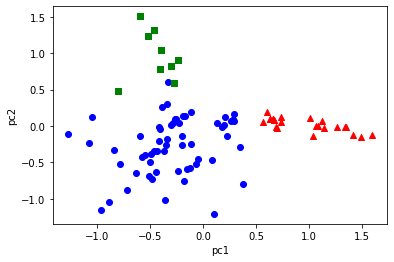

In [124]:
colors = ["r", "b", "g"]
markers = ["^", "o", "s"]
for c in df["cluster"].unique():
    cluster_subset = df[df["cluster"] == c]
    plt.scatter(cluster_subset["pc1"], cluster_subset["pc2"], color=colors[c], marker=markers[c])
plt.xlabel("pc1")
plt.ylabel("pc2")

We can see that dimensiomality reduction really helped in visualizing our clusters. Instead of the 32 different columns we can visualize our cluster just by this two principal components. The 3 clusters are well visible and barely overlap each other.

Now let's proceed to load information about the offers so as to get a better understanding of the performance of the offers. The offer_id column are the columns for the customer_interactions.csv.

In [155]:
offer_info = pd.read_csv("offer_info.csv")
offer_info

,offer_id,varietal
0,1,Malbec
1,2,Pinot Noir
2,3,Espumante
3,4,Champagne
4,5,Cabernet Sauvignon
5,6,Prosecco
6,7,Prosecco
7,8,Espumante
8,9,Chardonnay
9,10,Prosecco


Let's try to map the wines to three categories: Red, White, and Sparkling wine.

In [156]:
red = ["Cabernet Sauvignon", "Pinot Noir", "Merlot", "Malbec"]
white = ["Chardonnay", "Pinot Grigio", "Prosecco"]
sparkling = ["Espumante", "Champagne"]

In [157]:
def wine_type(wine):
    if wine in red:
        return "red wine"
    elif wine in white:
        return "white wine"
    elif wine in sparkling:
        return "sparkling wine"

In [244]:
offer_info["wine_type"] = offer_info["varietal"].map(wine_type)

In [245]:
offer_info.groupby(["wine_type"]).count()

,offer_id,varietal
wine_type,,
red wine,15,15
sparkling wine,10,10
white wine,7,7


Red wine seems to have had more offering. Further dissecting this info

In [246]:
offer_info.groupby(["wine_type", "varietal"]).count()

offer_id
wine_type      varietal                    
red wine       Cabernet Sauvignon         6
               Malbec                     2
               Merlot                     3
               Pinot Noir                 4
sparkling wine Champagne                  7
               Espumante                  3
white wine     Chardonnay                 2
               Pinot Grigio               1
               Prosecco                   4

We can see that red wine had more wine varietals offered during this period. While champagne was offered the most times in the offers.

Now, let's analyse the values of each clusters to find out the wine type different clusters prefer and even look at which wine type they are likely to interact with when given an offer. Our clusters will have the names Cluster 0, Cluster 1, and Cluster 2.

In [149]:
cluster_0_major = df[df["cluster"] == 0].sum()[:-3].sort_values(ascending=False)[:5].index.astype(int)
cluster_1_major = df[df["cluster"] == 1].sum()[:-3].sort_values(ascending=False)[:5].index.astype(int)
cluster_2_major = df[df["cluster"] == 2].sum()[:-3].sort_values(ascending=False)[:5].index.astype(int)

In [162]:
print(offer_info.loc[offer_info["offer_id"].isin(cluster_0_major), ["varietal", "wine_type"]])

        varietal       wine_type
6       Prosecco      white wine
7      Espumante  sparkling wine
17     Espumante  sparkling wine
28  Pinot Grigio      white wine
29        Malbec        red wine


As shown above, customer interactions from this cluster came from all three wine types. This cluster may be composed of customers with a variety of wine tastes.

In [163]:
print(offer_info.loc[offer_info["offer_id"].isin(cluster_1_major), ["varietal", "wine_type"]])

     varietal       wine_type
3   Champagne  sparkling wine
5    Prosecco      white wine
10  Champagne  sparkling wine
21  Champagne  sparkling wine
30  Champagne  sparkling wine


Our second cluster seems to be composed of customers who love sparkling wine, and specifically champagne. The marketing strategy for this cluster  can be champagne offers.

In [164]:
print(offer_info.loc[offer_info["offer_id"].isin(cluster_2_major), ["varietal", "wine_type"]])

      varietal wine_type
0       Malbec  red wine
1   Pinot Noir  red wine
16  Pinot Noir  red wine
23  Pinot Noir  red wine
25  Pinot Noir  red wine


Our last cluster seems to be mostly of red wine lovers. The marketing strategy can be to recommend more red wine varietals.

## Data Visualization

Before we visualize our data let us transform the offer_id column to the number of interactions for every initiative.

In [248]:
def rename(i):
    return offer_info.loc[offer_info["offer_id"] == i, "varietal"].values[0]

In [249]:
df[df["cluster"] == 2].sum()[:-3].sort_values(ascending=False).index.astype(int).map(rename)

Index(['Pinot Noir', 'Pinot Noir', 'Pinot Noir', 'Pinot Noir', 'Malbec',
       'Prosecco', 'Chardonnay', 'Champagne', 'Cabernet Sauvignon', 'Merlot',
       'Prosecco', 'Prosecco', 'Espumante', 'Chardonnay', 'Champagne',
       'Espumante', 'Champagne', 'Prosecco', 'Cabernet Sauvignon', 'Merlot',
       'Cabernet Sauvignon', 'Champagne', 'Espumante', 'Champagne',
       'Cabernet Sauvignon', 'Champagne', 'Champagne', 'Cabernet Sauvignon',
       'Cabernet Sauvignon', 'Pinot Grigio', 'Malbec', 'Merlot'],
      dtype='object')

In [250]:
cluster_0 = pd.DataFrame()
cluster_0["num"] = df[df["cluster"] == 0].sum()[:-3]
cluster_0["varietal"] = cluster_0.index.astype(int).map(rename)
cluster_0["wine_type"] = cluster_0["varietal"].map(wine_type)
cluster_0.sort_values("num", ascending=False)

,num,varietal,wine_type
30,16.0,Malbec,red wine
29,15.0,Pinot Grigio,white wine
7,12.0,Prosecco,white wine
18,11.0,Espumante,sparkling wine
8,11.0,Espumante,sparkling wine
13,6.0,Merlot,red wine
24,0.0,Pinot Noir,red wine
20,0.0,Cabernet Sauvignon,red wine
21,0.0,Champagne,sparkling wine
22,0.0,Champagne,sparkling wine


In [251]:
cluster_0_totals = cluster_0.groupby(["wine_type"])["num"].sum()

In [252]:
bar_0 = px.bar(
    x= cluster_0_totals.index,
    y= cluster_0_totals.values,
    color= cluster_0_totals.index,
    title="Cluster 0 Customers by Wine Type" 
)
bar_0.update_layout(
    xaxis_title = "Wine Type",
    yaxis_title = "Number of Customers Interactions"
)
bar_0.show()

As initially stated, Cluster 0 is composed of customers that have variety in taste. The interaction does not seem to be biased for any particular wine type.

In [253]:
cluster_1 = pd.DataFrame()
cluster_1["num"] = df[df["cluster"] == 1].sum()[:-3]
cluster_1["varietal"] = cluster_1.index.astype(int).map(rename)
cluster_1["wine_type"] = cluster_1["varietal"].map(wine_type)
cluster_1.sort_values("num", ascending=False)

,num,varietal,wine_type
22,21.0,Champagne,sparkling wine
31,17.0,Champagne,sparkling wine
11,13.0,Champagne,sparkling wine
4,12.0,Champagne,sparkling wine
6,12.0,Prosecco,white wine
9,10.0,Chardonnay,white wine
14,9.0,Merlot,red wine
1,9.0,Malbec,red wine
8,9.0,Espumante,sparkling wine
27,8.0,Champagne,sparkling wine


In [255]:
cluster_1_totals = cluster_1.groupby(["wine_type"])["num"].sum()

In [256]:
bar_1 = px.bar(
    x= cluster_1_totals.index,
    y= cluster_1_totals.values,
    color= cluster_1_totals.index,
    title="Cluster 1 Customers by Wine Type" 
)
bar_1.update_layout(
    xaxis_title = "Wine Type",
    yaxis_title = "Number of Customers Interactions"
)
bar_1.show()

For Cluster 1, sparkling wine seems to be winning over this lot.

In [220]:
cluster_2 = pd.DataFrame()
cluster_2["num"] = df[df["cluster"] == 2].sum()[:-3]
cluster_2["varietal"] = cluster_2.index.astype(int).map(rename)
cluster_2["wine_type"] = cluster_2["varietal"].map(wine_type)
cluster_2.sort_values("num", ascending=False)

cluster_2_totals = cluster_2.groupby(["wine_type"])["num"].sum()

bar_2 = px.bar(
    x= cluster_2_totals.index,
    y= cluster_2_totals.values,
    color= cluster_2_totals.index,
    title="Cluster 1 Customers by Wine Type" 
)
bar_2.update_layout(
    xaxis_title = "Wine Type",
    yaxis_title = "Number of Customers"
)
bar_2.show()

Here in Cluster 2 we have Red Wine lovers. No doubt this group will enjoy more red wine.

## Analysis of Wine Varietals

In [229]:
cluster_2.groupby(["wine_type", "varietal"], as_index=False)["num"].sum()

,wine_type,varietal,num
0,red wine,Cabernet Sauvignon,0.0
1,red wine,Malbec,1.0
2,red wine,Merlot,0.0
3,red wine,Pinot Noir,36.0
4,sparkling wine,Champagne,1.0
5,sparkling wine,Espumante,0.0
6,white wine,Chardonnay,1.0
7,white wine,Pinot Grigio,0.0
8,white wine,Prosecco,1.0


In [257]:
cluster_2_totals = cluster_2.groupby(["wine_type", "varietal"], as_index=False)["num"].sum()

grouped_bar_2 = px.bar(
    y=cluster_2_totals.wine_type,
    x=cluster_2_totals.num,
    color=cluster_2_totals.varietal,
    title="Cluster 0",
    orientation="h",
    barmode="group" 
)
grouped_bar_2.update_layout(
    yaxis_title = "Wine Type",
    xaxis_title = "Number of Customers Interactions"
)
grouped_bar_2.show()

A big chunk of Cluster 0 interactions come from Pinot Noir. These customers have shown a huge liking for this wine varietal. Therefore, to increase the engagement for these customers the marketing can give more offers for Pinot Noir cause it's clear of the rest even for the fellow red wines.

In [259]:
cluster_1_totals = cluster_1.groupby(["wine_type", "varietal"], as_index=False)["num"].sum()

grouped_bar_1 = px.bar(
    y=cluster_1_totals.wine_type,
    x=cluster_1_totals.num,
    color=cluster_1_totals.varietal,
    title="Cluster 1",
    orientation="h",
    barmode="group" 
)
grouped_bar_1.update_layout(
    yaxis_title = "Wine Type",
    xaxis_title = "Number of Customer Interactions"
)
grouped_bar_1.show()

Cluster 1 interactions seems to be predominantly champagne. It has shown excellent performance and therefore deserve more focussed marketing strategies.


In [260]:
cluster_0_totals = cluster_0.groupby(["wine_type", "varietal"], as_index=False)["num"].sum()

grouped_bar_0 = px.bar(
    y=cluster_0_totals.wine_type,
    x=cluster_0_totals.num,
    color=cluster_0_totals.varietal,
    title="Customers characterized by Wine Variety",
    orientation="h",
    barmode="group" 
)
grouped_bar_0.update_layout(
    yaxis_title = "Wine Type",
    xaxis_title = "Number of Customers Interactions"
)
grouped_bar_0.show()

This cluster is the competitive cluster where four wine varietals showed good customer interaction. The marketing strategy can be to have Espumante, Malbec, Pinot Grigio, Prosecco be given offers in that order of importance. This base has more variety.

# Summary

In conclusion, we have helped the marketing team to identify three clusters. The first cluster seems to enjoy variety. With this cluster, 4 wine varietals stood out. These include: Espumante, Malbec, Pinot Grigio, Prosecco. The marketing offers may be narrowed down to these four, but also room for more is still possible such as Merlot. The other two customer groups show a huge prefernce for specific wine varietals with one preferring champagne and the other preferring Pinot Noir. Reducing offers on other varietals and increasing offers for these specific wines may result in even more increased customer interactions.

# Marketing Strategies

<ul>
<li>Cluster 0 - Narrow down offers to Espumante, Malbec, Pinot Grigio, Prosecco</li>
<li>Cluster 1 - Focus marketing resources on offers for Champagne</li>
<li>Cluster 2 - Focus marketing resources on offers for Pinot Noir</li>
</ul>

With that we have moved from not knowing anything about the marketing initiatives to delivering actionable insights for our marketing team. We have turned water to wine. Let's drink away. Cheers!!!

<img src="https://media.giphy.com/media/3og0IH4rS0UN7hPTq0/giphy.gif">